In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

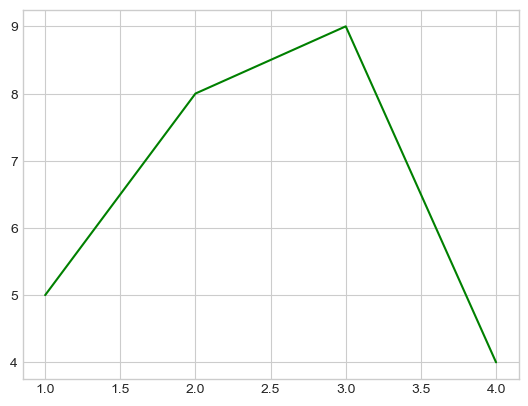

In [71]:
x = [1,2,3,4]
y = [5,8,9,4]
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(x,y,color="green")

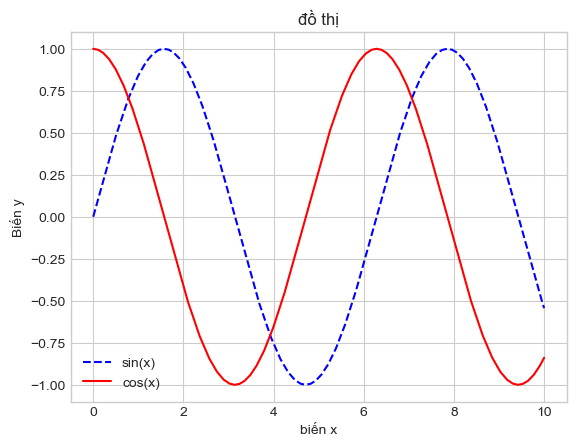

In [97]:
x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x),data=None,marker=None,linestyle="--",color="b",label="sin(x)")
plt.plot(x,np.cos(x),data=None,marker=None,linestyle=None,color="r",label="cos(x)")
plt.title("đồ thị")
plt.xlabel("biến x")
plt.ylabel("Biến y")
#plt.axis([xmin=, xmax=, ymin=, ymax=])
plt.legend()

In [ ]:
plt.bả

[Text(0.5, 1.0, 'đồ thị')]

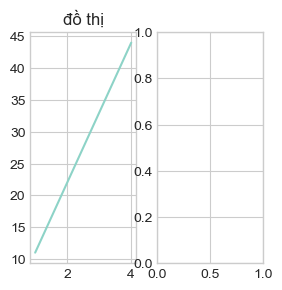

In [121]:
# Prepare Data
x=[1,2,3,4]
y=[11,22,33,44]
# Setup plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(3,3))
#Plot the data
ax1.plot(x,y);
ax1.set(title="đồ thị")

AttributeError: 'Figure' object has no attribute 'label'

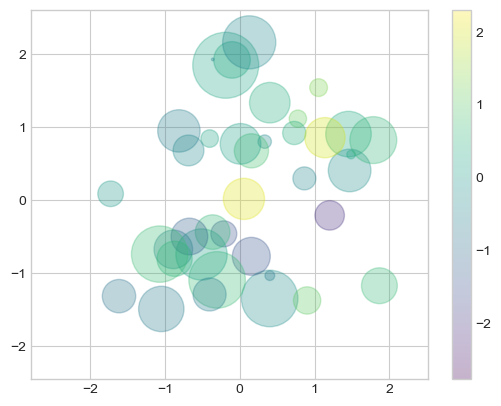

In [137]:
rnp=np.random.RandomState(0)
x=rnp.randn(100)
y=rnp.randn(100)
color = rnp.randn(100)
sizes = 1000*rnp.randn(100)
fig,ax=plt.subplots()
abc=ax.scatter(x,y,c=color,s=sizes,cmap="viridis",alpha=0.3)
fig.colorbar(abc)


<BarContainer object of 3 artists>

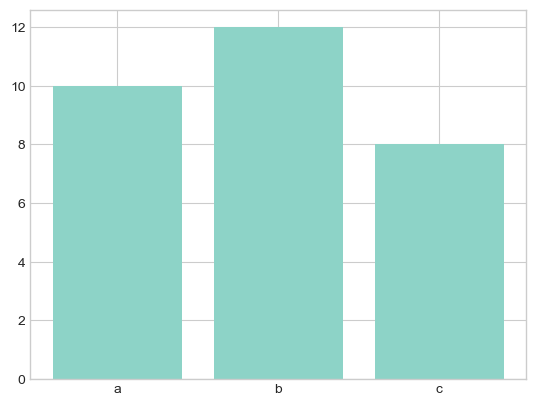

In [151]:
abc={"a":10,"b":12,"c":8}
fig,ax=plt.subplots()
ax.bar(abc.keys(),abc.values())

(array([ 6., 17., 23., 42., 60., 43., 30., 21.,  4.,  4.]),
 array([146.2991427 , 151.5631628 , 156.82718289, 162.09120299,
        167.35522309, 172.61924319, 177.88326329, 183.14728339,
        188.41130349, 193.67532359, 198.93934369]),
 <BarContainer object of 10 artists>)

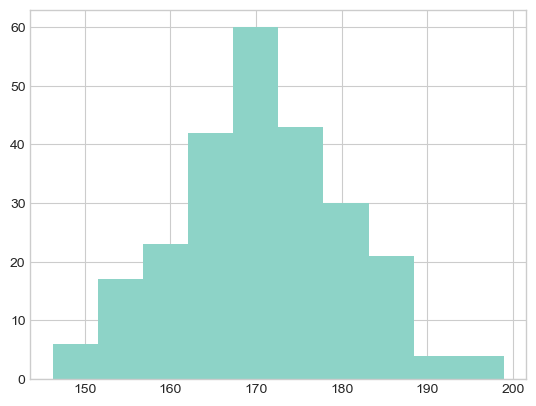

In [163]:
abc=np.random.normal(170,10,250)
fig,ax=plt.subplots()
ax.hist(abc)

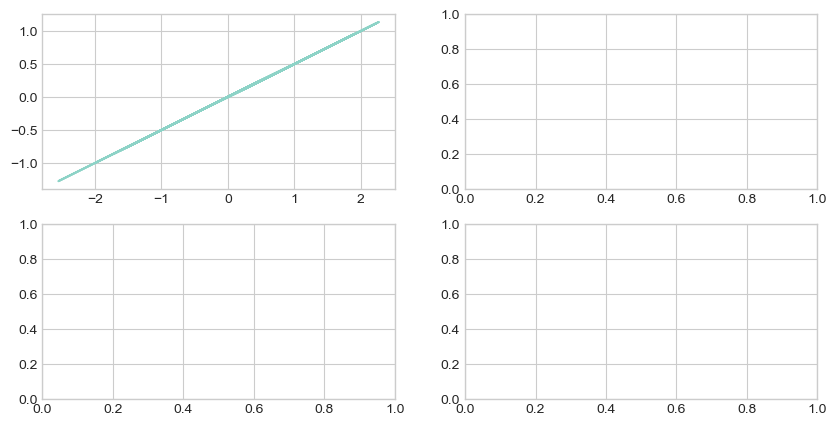

In [159]:

fig,ax = plt.subplots(nrows = 2,
                      ncols=2,
                      figsize=(10,5))
ax[0,0].plot(x,y)
ax[0,1].plot(x,y)
ax[1,0].plot(x,y)
ax[1,1].plot(x,y)

In [187]:
tips_df=sns.load_dataset('tips')
sns.set_theme()

<Axes: xlabel='total_bill', ylabel='Count'>

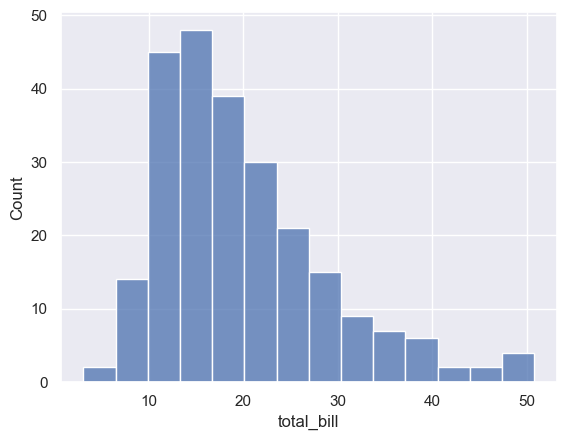

In [189]:
sns.histplot(data=tips_df,x=tips_df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

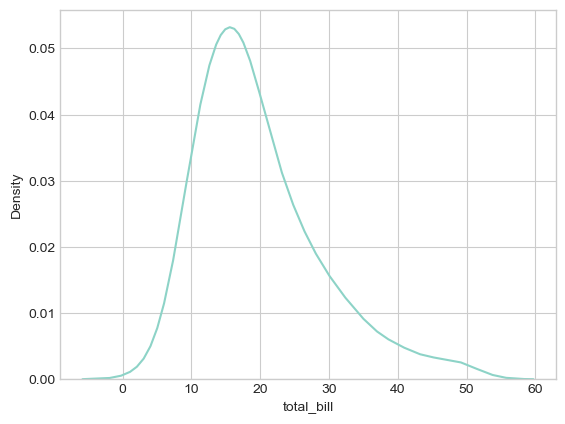

In [181]:
sns.kdeplot(data=tips_df,x=tips_df['total_bill'])

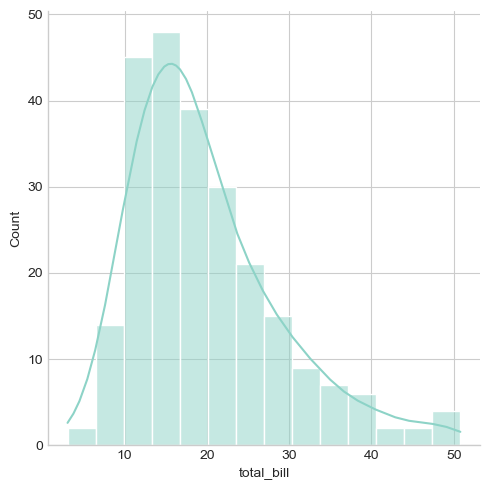

In [185]:
    sns.displot(data=tips_df,x=tips_df['total_bill'],kde=True)

<Axes: xlabel='sex', ylabel='count'>

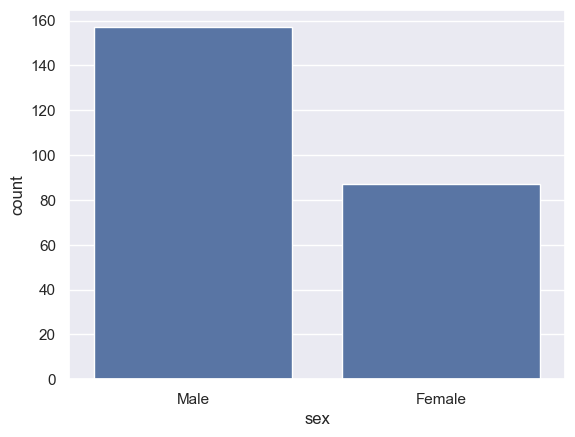

In [217]:
sns.countplot(data=tips_df,x="sex")

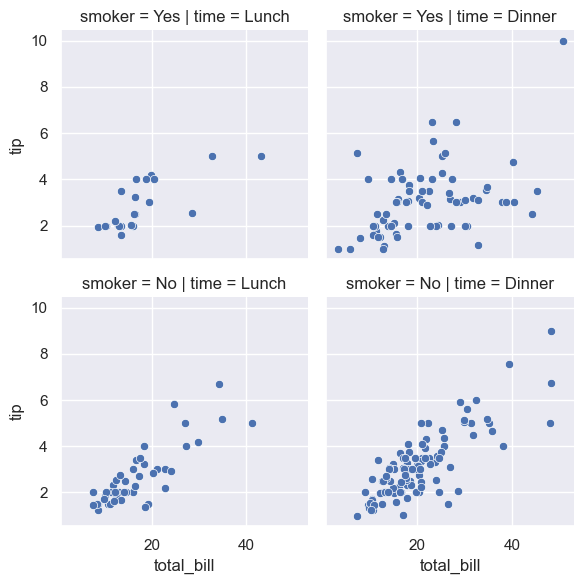

In [225]:
tip_fg=sns.FacetGrid(data=tips_df,row="smoker",col="time",)
tip_fg.map(sns.scatterplot,"total_bill",'tip')